# SVM example: Universal Bank loan campaiKn customer modeling

In [2]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

---

## Injest data

In [3]:
df = pd.read_csv('UniversalBank.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


#### Data is *dense* (no missing values) and numerical.

In [5]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [6]:
Xcols = ['Age', 'Experience', 'Income', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Securities Account',
       'CD Account', 'Online', 'CreditCard']

In [7]:
X = df[Xcols]
y = df['Personal Loan']

### Standardize X

In [8]:
scaler = StandardScaler()
Xs = scaler.fit_transform(X)

In [9]:
Xs[:3]

array([[-1.77441684, -1.66607847, -0.53822878,  1.39741398, -0.19338544,
        -1.04907792, -0.55552393,  2.92891517, -0.25354028, -1.21661774,
        -0.64531434],
       [-0.02952359, -0.09633022, -0.8641094 ,  0.52599094, -0.25061056,
        -1.04907792, -0.55552393,  2.92891517, -0.25354028, -1.21661774,
        -0.64531434],
       [-0.55299157, -0.44516316, -1.36379301, -1.21685513, -0.53673618,
        -1.04907792, -0.55552393, -0.34142334, -0.25354028, -1.21661774,
        -0.64531434]])

In [10]:
Xs.mean(axis=0), Xs.std(axis=0)

(array([-2.13162821e-18, -1.17950094e-16,  1.44950718e-16,  1.00186526e-16,
        -6.39488462e-17,  2.55795385e-17, -5.61328761e-17, -2.27373675e-17,
         2.13162821e-17,  4.12114787e-17,  7.10542736e-18]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))

## SVM Model

g =0.01
g =0.1
g =0.5
g =1
g =2


<ErrorbarContainer object of 3 artists>

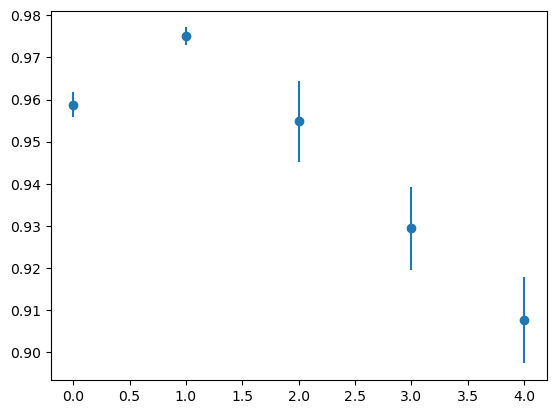

In [11]:
hyper_mean = []
hyper_std = []
kf = KFold(5)
hyper_g = [0.01, 0.1, 0.5, 1, 2]

for g in hyper_g:
    print(f'g ={g}')
    svm = SVC(gamma = g)
    svm_kf_results = np.array([])
    for train_ind, test_ind in kf.split(Xs):
        Xtrain, Xtest = Xs[train_ind], Xs[test_ind]
        ytrain, ytest = y[train_ind], y[test_ind]
        svm.fit(Xtrain, ytrain)
        ypred = svm.predict(Xtest)
        acc = accuracy_score(ytest, ypred)
        svm_kf_results = np.append(svm_kf_results, acc)
    hyper_mean.append(svm_kf_results.mean())
    hyper_std.append(svm_kf_results.std())

plt.errorbar(range(len(hyper_g)), hyper_mean, hyper_std, fmt='o')

gamma = 0.1 overall best hyperparameter value

## KNN Model

K =3
K =5
K =7
K =9
K =11
K =13
K =15
K =17
K =19


<ErrorbarContainer object of 3 artists>

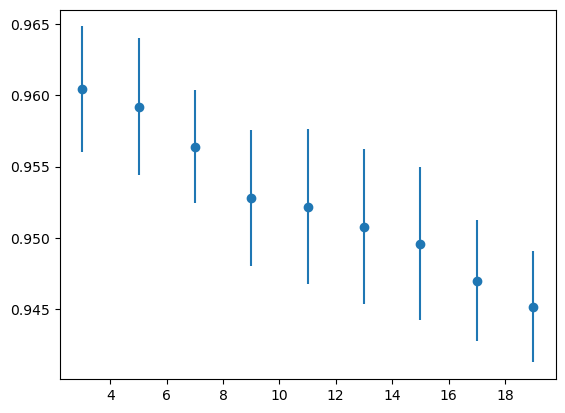

In [12]:
hyper_mean = []
hyper_std = []
kf = KFold(5)

start = 3 
end = 21 

for i in range(start, end, 2):
    print(f'K ={i}')
    KNN = KNeighborsClassifier(n_neighbors = i)
    KNN_kf_results = np.array([])
    for train_ind, test_ind in kf.split(Xs):
        Xtrain, Xtest = Xs[train_ind], Xs[test_ind]
        ytrain, ytest = y[train_ind], y[test_ind]
        KNN.fit(Xtrain, ytrain)
        ypred = KNN.predict(Xtest)
        acc = accuracy_score(ytest, ypred)
        KNN_kf_results = np.append(KNN_kf_results, acc)
    hyper_mean.append(KNN_kf_results.mean())
    hyper_std.append(KNN_kf_results.std())

plt.errorbar(range(start,end,2), hyper_mean, hyper_std, fmt='o')

k = 3 overall best hyperparameter value

## Logistic Model

g =1
g =2
g =3
g =4
g =5
g =6
g =7
g =8
g =9


<ErrorbarContainer object of 3 artists>

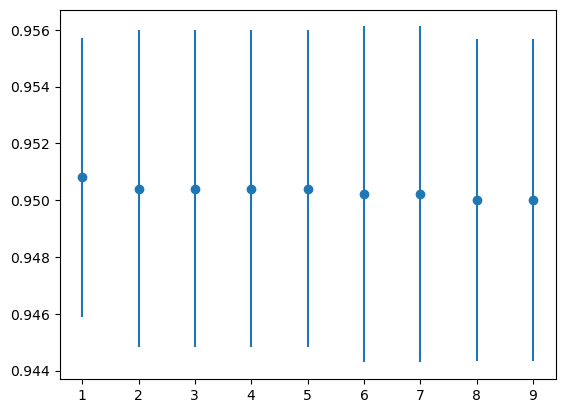

In [22]:
hyper_mean = []
hyper_std = []
start = 1 
end = 10

kf = KFold(5)

for i in range(start, end):
    print(f'g ={i}')
    log = LogisticRegression(C = i)
    log_kf_results = np.array([])
    for train_ind, test_ind in kf.split(Xs):
        Xtrain, Xtest = Xs[train_ind], Xs[test_ind]
        ytrain, ytest = y[train_ind], y[test_ind]
        log.fit(Xtrain, ytrain)
        ypred = log.predict(Xtest)
        acc = accuracy_score(ytest, ypred)
        log_kf_results = np.append(log_kf_results, acc)
    hyper_mean.append(log_kf_results.mean())
    hyper_std.append(log_kf_results.std())

plt.errorbar(range(start, end), hyper_mean, hyper_std, fmt='o')

g =0.01
g =0.1
g =0.25
g =0.5
g =1


<ErrorbarContainer object of 3 artists>

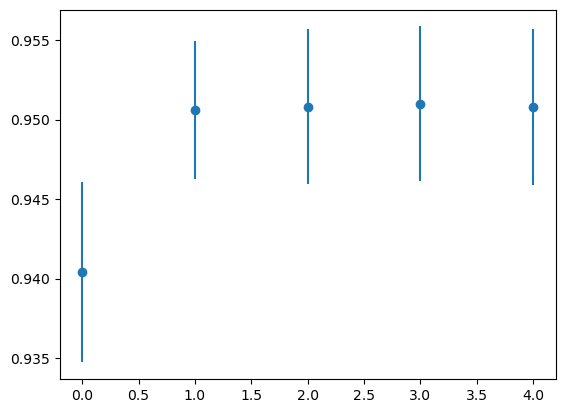

In [23]:
hyper_mean = []
hyper_std = []
hyper_c = [0.01, 0.1, 0.25, 0.5, 1]
kf = KFold(5)

for c in hyper_c:
    print(f'g ={c}')
    log = LogisticRegression(C = c)
    log_kf_results = np.array([])
    for train_ind, test_ind in kf.split(Xs):
        Xtrain, Xtest = Xs[train_ind], Xs[test_ind]
        ytrain, ytest = y[train_ind], y[test_ind]
        log.fit(Xtrain, ytrain)
        ypred = log.predict(Xtest)
        acc = accuracy_score(ytest, ypred)
        log_kf_results = np.append(log_kf_results, acc)
    hyper_mean.append(log_kf_results.mean())
    hyper_std.append(log_kf_results.std())

plt.errorbar(range(len(hyper_c)), hyper_mean, hyper_std, fmt='o')

c = 0.1 overall best hyperparameter value

## New Customer Prediction
SVM model with hyperparameter gamma set to 0.1 has the best accuracy and smallest std


In [13]:
df2 = pd.read_csv("bank_new_customers.csv")
df2

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,5001,40,10,84,95211,2,2,1,0,NaN,0,0,1,1


In [14]:
x = df2[Xcols]

In [24]:
Xnew = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(Xs, y)

In [25]:
svm = SVC(gamma = 0.1)
svm = svm.fit(Xtrain, ytrain)

In [26]:
print(svm.predict(Xnew))

[0]


Prediction the new customer will not accept the loan offer